In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## 1) Cálculo do VaR Histórico

In [3]:
# colocar o nome da ação, junto com ".SA: 
ticker = ['ARZZ3.SA']

In [4]:
# insere o período histórico da ação
data = yf.download(ticker, start='2022-01-01', end='2023-01-03')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,78.000000,78.000000,72.000000,72.230003,70.492134,1080000
2022-01-04,72.860001,72.860001,69.849998,70.099998,68.413376,771200
2022-01-05,69.809998,70.040001,65.910004,66.730003,65.124474,1645600
2022-01-06,66.620003,68.339996,64.589996,67.949997,66.315109,1938400
2022-01-07,68.080002,68.849998,66.529999,67.410004,65.788109,487500
...,...,...,...,...,...,...
2022-12-26,80.760002,80.760002,77.470001,78.559998,78.559998,525600
2022-12-27,78.820000,78.900002,75.930000,76.570000,76.570000,1218700
2022-12-28,76.919998,79.300003,76.629997,78.680000,78.680000,970700


In [5]:
# calcula os retornos (que nada mais são do que a variação percentual do preço da ação ao longo do tempo)
returns = data['Adj Close'].pct_change().dropna()
returns

Date
2022-01-04   -0.029489
2022-01-05   -0.048074
2022-01-06    0.018282
2022-01-07   -0.007947
2022-01-10   -0.039015
                ...   
2022-12-26   -0.028324
2022-12-27   -0.025331
2022-12-28    0.027556
2022-12-29   -0.005465
2023-01-02   -0.052780
Name: Adj Close, Length: 250, dtype: float64

In [6]:
# calcula o percentil 5% do VaR
alpha = 0.05
var = np.percentile(returns, alpha*100)
var

-0.03895773690769344

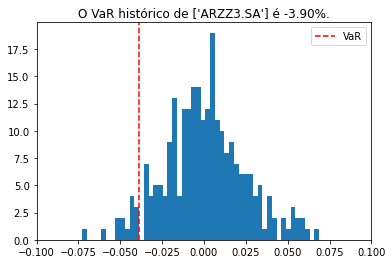

In [7]:
# plota o histograma dos retornos com a linha do percentil do VaR
plt.hist(returns, bins=50)
plt.axvline(x=var, color='r', linestyle='--', label='VaR')
plt.xlim(-0.1,0.1)
plt.legend()
plt.title(f"O VaR histórico de {ticker} é {var:.2%}.")
plt.show()

## 2) Visualizando os Retornos e VaRs para mais ações de forma automática

In [8]:
# define as acoes
tickers = ['CIEL3.SA',
'CURY3.SA',
'DESK3.SA',
'EMBR3.SA',
'ORVR3.SA',
'PSSA3.SA',
'SMFT3.SA',
'SMTO3.SA',
'STBP3.SA']

In [9]:
# Define o tamanho da matriz de histogramas de retornos de ações
nrows = 3
ncols = 3

tickers = np.array(tickers).reshape(nrows,ncols)

# função para gerar os retornos e VaR de cada ação
def gera_var(i,j):
    
    data = yf.download(tickers[i][j], start='2022-01-01', end='2023-01-03');

    returns = data['Adj Close'].pct_change().dropna()

    alpha = 0.05
    var = np.percentile(returns, alpha*100)

    return returns , var

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(*args, **kw)>

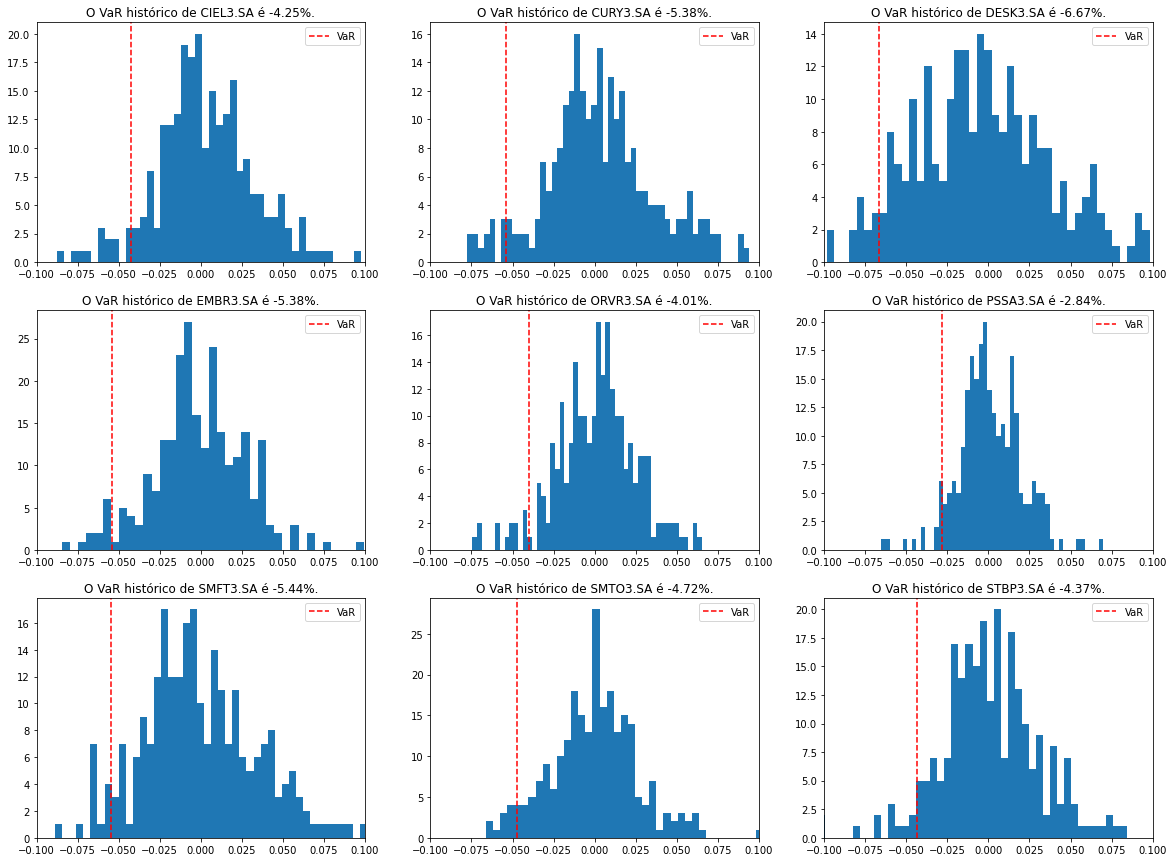

In [10]:
# Cria a matriz de histogramas
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))

for i in range(nrows):
    for j in range(ncols):
        
        returns , var = gera_var(i,j)
        
        axs[i,j].hist(returns, bins=50)
        axs[i,j].axvline(x=var, color='r', linestyle='--', label='VaR')
        axs[i,j].set_xlim(-0.1,0.1)
        axs[i,j].legend()
        axs[i,j].set_title(f"O VaR histórico de {tickers[i][j]} é {var:.2%}.")

plt.show